# Make figures included in the manuscript and supplement
TBD: add link/citation here

# Set up environment

In [1]:
# conda activate mri
import pandas as pd
from glob import glob
import numpy as np

#stats
import statsmodels.api as sm
import scipy

# graphs
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# colors

In [3]:
mycolors=["blue","orange"]
sns.color_palette(mycolors, as_cmap = False)

[(0.0, 0.0, 1.0), (1.0, 0.6470588235294118, 0.0)]

In [4]:
#attempting a darker version of the above
mycolors2= ["darkblue","darkgoldenrod"]
sns.color_palette(mycolors2, as_cmap = False)

[(0.0, 0.0, 0.5450980392156862),
 (0.7215686274509804, 0.5254901960784314, 0.043137254901960784)]

# Inputs

In [5]:
main_dir = '/work/swglab/data/R61rtsz/analysis/proj_franci_selfref/analysis_task_selfref'
behave_f = f'{main_dir}/behave_all_n22.csv'
activation_d = f'{main_dir}/group_level/n22_cope4_self_gt_sema_neurosynth_flame1+2.gfeat\cope1.feat'

# Load data

In [6]:
behave=pd.read_csv(behave_f)
behave['group'] = behave['group'].str.replace('real','experimental').str.replace('sham','control')
behave['site_scan'] = behave['site_scan'].astype(str).str.replace('1','$NEU_{Prisma}$').str.replace('2',"$MIT_{Prisma}$").str.replace('3',"$MIT_{Trio}$")
behave = behave.set_index('participant_id')
behave.head(2)

,conn_id,group,included,why_exclude,group_real,group_sham,sex,LOCALIZER,REAL,SHAM,...,noting_practice_noting1,noting_practice_noting2,noting_practice_noting3,noting_practice_used_practice_during_stg_feedback,id,beta_change_loc_vs_nf1,avh_change_nf1_nf2,avh_change_loc_nf2,avh_change_pre_nf2,beta_change_pre_vs_real
participant_id,,,,,,,,,,,,,,,,,,,,,
sub-R61rtsz257,1,experimental,1,NaN,1.0,NaN,0,ses-localizer,ses-real,NaN,...,NaN,NaN,NaN,NaN,257,-125.368707,-8.0,-20.0,-20.0,-53.263282
sub-R61rtsz260,2,experimental,1,NaN,1.0,NaN,1,ses-localizer,ses-real,NaN,...,1.0,1.0,1.0,yes,260,36.501752,0.0,0.0,-15.0,-10.217302


# Main manuscript - Figure 2B

In [8]:
tmp = pd.melt(behave.reset_index(), id_vars =['participant_id','group'], 
              var_name = 'session', value_vars = ['activation_zvalue_loc_allclusters', 'activation_zvalue_nf1_allclusters'], value_name = 'zvalue')
tmp['session'] = tmp['session'].str.replace('activation_zvalue_','').str.replace('loc','Pre').str.replace('nf1','Post').str.replace('_allclusters','')
tmp.columns=tmp.columns.str.title()
tmp.head(2)

,Participant_Id,Group,Session,Zvalue
0,sub-R61rtsz257,experimental,Pre,1.752417
1,sub-R61rtsz260,experimental,Pre,-0.200936


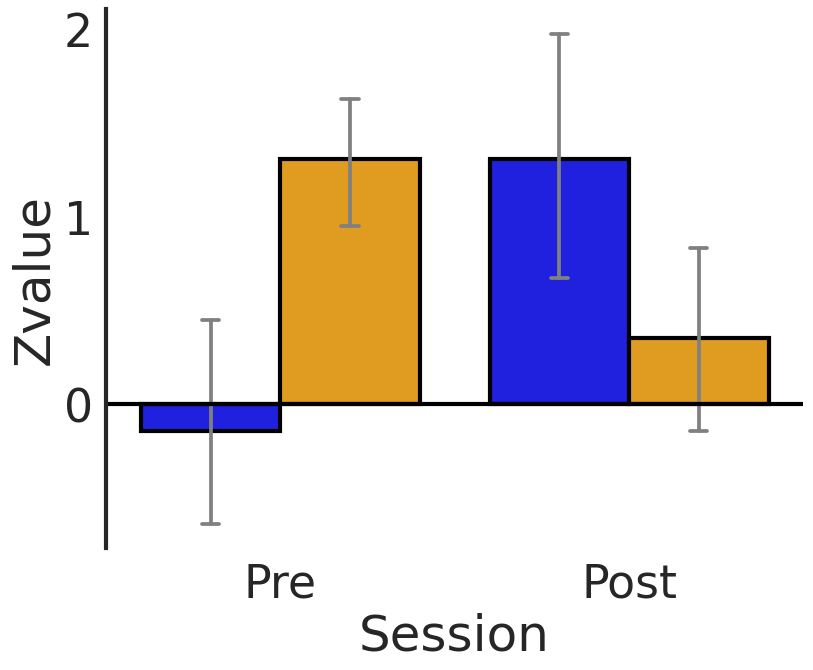

In [9]:
lw = 3 #linewidth
sns.set_theme(style="white", font_scale= 3,
              rc = {"axes.spines.right": False, 
                   "axes.spines.top": False, 
                   "axes.spines.bottom": False,
                   "axes.linewidth":lw}); 

g, ax = plt.subplots(figsize=(9,7))
ax = sns.barplot(data=tmp, x="Session", y="Zvalue",hue="Group", errorbar=('ci', 95),
                 palette = mycolors, errcolor="gray",linewidth=lw, capsize=.05, edgecolor='black');
ax.axhline(0, ls='-', color = 'black', linewidth=lw)
plt.legend("", frameon=False);
# plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0,title='Group', frameon=False)

**Fig. 2.Group and individual self-referential activation results.** Results of self-referential processing activity (self>semantic) within and between the experimental (n = 11; blue) and control group (n = 11; yellow). A) Between-
group differences showing activity increase within the self-reference network after NFB (post>pre-NFB) greater for the experimental group compared to the control
group (experimental>control). Colored circles indicate the same clusters across multiple slices, covering portions of the ACC (blue), superior frontal gyrus (green),
and mPFC (blue and yellow) in both horizontal (left) and sagittal (right) brain views. All clusters were derived using pTFCE and thresholded at a voxel z-value>3.1,
corresponding to a significance p-value<0.001.. B) Task activity levels average across the identified clusters (y-axis) for the baseline fMRI visit (pre) and the NFB
visit (post) for each group. C) Individual activity change levels (filled bars) for each participant (x-axis) of both groups. Within-group average change is also reported
(unfilled, outlined bars). Activation change was calculated as activity post-NFB minus pre-NFB, wherein a positive change value represents an activity increase after
receiving NFB. Error bars represent the 95 % confidence interval. X, y, z coordinates correspond to the Montreal Neurological Institute space. A, anterior; L, left; P,
posterior; R, right. (For interpretation of the references to color in this figure legend, the reader is referred to the web version of this article.)

# Main manuscript - Figure 2C

In [10]:
myy = "activation_zvalue_change_nf1_loc_allclusters"
tmp = behave[['group',myy]]
tmp.head(2)

,group,activation_zvalue_change_nf1_loc_allclusters
participant_id,,
sub-R61rtsz257,experimental,-1.144592
sub-R61rtsz260,experimental,1.004000


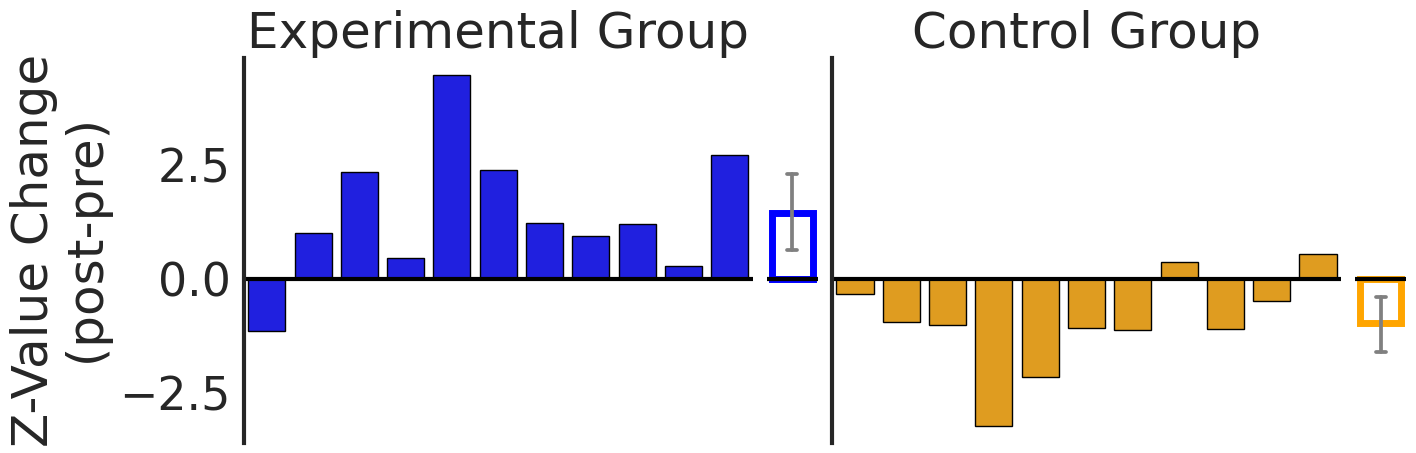

In [11]:
g, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True, 
                       gridspec_kw={'width_ratios': [3, 0.3, 3, 0.3]})

# group1
d = "experimental"
c = mycolors[0]
i = 0
sns.barplot(data=tmp[tmp['group'] == d], ax=axes[i], y=myy, x=tmp[tmp['group'] == d].index.values, color = c, edgecolor='black')
axes[i].axhline(0, ls='-', color = 'black', linewidth=lw)
axes[i].set(xlabel=None, xticklabels=[],ylabel="Z-Value Change\n (post-pre)")
axes[i].set_title("Experimental Group")

# group1 summary stats from group beta change only
i +=1
sns.barplot(data=tmp[tmp['group'] == d], ax=axes[i], y= myy, color = "white",
            errorbar=('ci', 95), capsize=.2, edgecolor=c,errcolor="gray", linewidth = 5)
axes[i].axhline(0, ls='-', color = 'black', linewidth=lw)
axes[i].axis('off')
axes[i].set(ylabel=None, xticklabels=[])

# group2
d = "control"
i +=1
c=mycolors[1]
sns.barplot(data=tmp[tmp['group'] == d], ax=axes[i], y= myy, x=tmp[tmp['group'] == d].index.values, color = c, edgecolor='black')
axes[i].axhline(0, ls='-', color = 'black', linewidth=lw)
axes[i].set(xlabel=None, xticklabels=[])
axes[i].set(ylabel=None)
axes[i].set_title("Control Group");

# group2 summary stats from group beta change only
i +=1
sns.barplot(data=tmp[tmp['group'] == d], ax=axes[i], y= myy, color = "white", 
            errorbar=('ci', 95), capsize=.2, edgecolor=c,errcolor="gray", linewidth = 5)
axes[i].axhline(0, ls='-', color = 'black', linewidth=lw)
axes[i].axis('off')
axes[i].set(ylabel=None, xticklabels=[])

#all plots
plt.subplots_adjust(wspace=0.05, hspace=0);

**Fig. 2.Group and individual self-referential activation results.**
Results of self-referential processing activity (self>semantic) within and between the experimental (n = 11; blue) and control group (n = 11; yellow). A) Between-
group differences showing activity increase within the self-reference network after NFB (post>pre-NFB) greater for the experimental group compared to the control
group (experimental>control). Colored circles indicate the same clusters across multiple slices, covering portions of the ACC (blue), superior frontal gyrus (green),
and mPFC (blue and yellow) in both horizontal (left) and sagittal (right) brain views. All clusters were derived using pTFCE and thresholded at a voxel z-value>3.1,
corresponding to a significance p-value<0.001.. B) Task activity levels average across the identified clusters (y-axis) for the baseline fMRI visit (pre) and the NFB
visit (post) for each group. C) Individual activity change levels (filled bars) for each participant (x-axis) of both groups. Within-group average change is also reported
(unfilled, outlined bars). Activation change was calculated as activity post-NFB minus pre-NFB, wherein a positive change value represents an activity increase after
receiving NFB. Error bars represent the 95 % confidence interval. X, y, z coordinates correspond to the Montreal Neurological Institute space. A, anterior; L, left; P,
posterior; R, right. (For interpretation of the references to color in this figure legend, the reader is referred to the web version of this article.)

# Supplement - Figure S3

In [12]:
myy = "activation_zvalue_change_nf1_loc_allclusters"
tmp = behave[[myy,'group','site_scan']]
tmp.head(2)

,activation_zvalue_change_nf1_loc_allclusters,group,site_scan
participant_id,,,
sub-R61rtsz257,-1.144592,experimental,$MIT_{Trio}$
sub-R61rtsz260,1.004000,experimental,$NEU_{Prisma}$


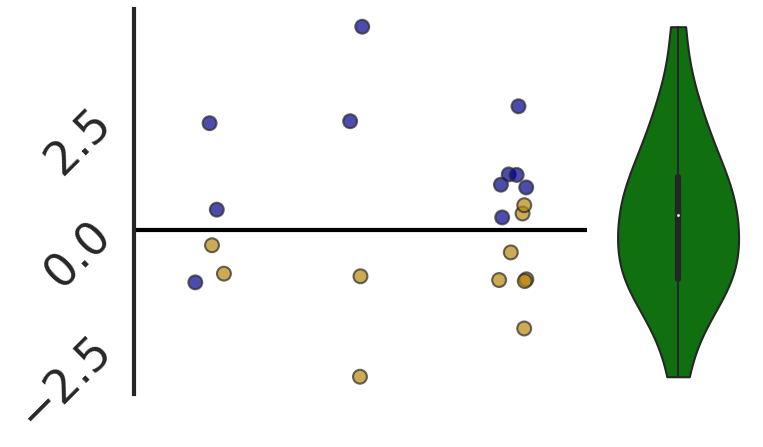

In [13]:
g, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True, 
                       gridspec_kw={'width_ratios': [3, 1]},
                      )
c=mycolors[0]
i = 0
sns.stripplot(data=tmp, y = myy, x = 'site_scan', hue = 'group', palette=mycolors2, ax=axes[i],
                order = ["$MIT_{Trio}$","$MIT_{Prisma}$","$NEU_{Prisma}$"],
                s = 10, linewidth = 1.5, alpha = 0.7, dodge = False);
axes[i].axhline(0, ls='-', color = 'black', linewidth=lw)
axes[i].tick_params(labelrotation=45)
axes[i].set(xlabel=None, xticklabels=[],ylabel="")
axes[i].legend("", frameon=False)

# group1 summary stats from group beta change only
i +=1
sns.violinplot(data=tmp, y = myy, ax=axes[i], color='green', cut=0);
axes[i].axis('off')
axes[i].set(ylabel=None, xticklabels=[])
axes[i].legend("", frameon=False)

#all plots
plt.subplots_adjust(wspace=0.05, hspace=0);

**Figure S3. Self-reference task activity change by MRI scanner and group.**
The graph represents the activity change expressed as the difference in activation (post-NFB minus pre-NFB) in self-referential processing (self > semantic) for the participants in the experimental (blue) and control (yellow) groups. Participants were all scanned on a 3.0T MRI Scanners, which were either a Trio (MIT site) or Prisma (MIT and NEU sites). The violin plot on the right represents the range and distribution of all data combined. MIT, Massachusetts Institute of Technology; NEU, Northeastern University.

# Supplement - Figure S5

In [14]:
myx = "activation_zvalue_change_nf1_loc_allclusters"
myy = "avh_change_nf1_nf2"
tmp = behave[['group',myx,myy,'nf2_minus_nf1']] 
tmp = tmp.dropna().drop(columns = 'nf2_minus_nf1')
tmp.head(2)

,group,activation_zvalue_change_nf1_loc_allclusters,avh_change_nf1_nf2
participant_id,,,
sub-R61rtsz257,experimental,-1.144592,-8.0
sub-R61rtsz260,experimental,1.004000,0.0


/home/f.morfini/softwares/miniconda3/envs/mri/lib/python3.11/site-packages/seaborn/axisgrid.py:1760: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


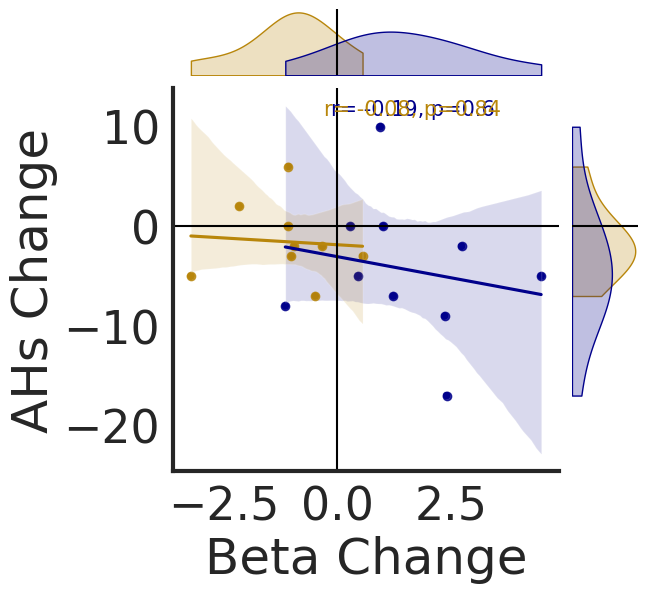

In [15]:
g= sns.jointplot(data=tmp, x=myx, y=myy, hue = 'group', 
                   palette = mycolors2, legend= False,
                  marginal_kws={'cut': 0})

for grabgroup, c,i  in zip(tmp['group'].unique(), mycolors2, range(len(tmp['group'].unique()))):
    f = sns.regplot(data=   tmp[tmp['group'] == grabgroup], x=myx, y=myy, color=c, truncate=True, 
                ci=95, ax=g.ax_joint)
    
    # add stats info to the plot
    grab = tmp[tmp['group'] == grabgroup].dropna()
    _,_,r,p,_=scipy.stats.linregress(x = grab[myx], y=grab[myy], alternative="two-sided")
    r,p = list(np.around(np.array([r,p]),2))
    plt.text((i+0.9)*-0.15, 11.15, f'r= {r}, p={p}', fontsize = 15, color=c)

# add lines on the marginal plots
g.ax_marg_x.axvline(x=0, color = "black")
g.ax_marg_y.axhline(y=0, color = "black")

# add lines in the main scatterplot
g.ax_joint.axvline(x=0, color = "black") #,linestyle='--', x = tips.sepal_length.median()
g.ax_joint.axhline(y=0, color = "black")

# remove main plot frame/despine
g.ax_marg_y.set_frame_on(False)
g.ax_marg_x.set_frame_on(False)

# labels/titles
g.ax_joint.set_xlabel("Beta Change")
g.ax_joint.set_ylabel("AHs Change");

**Figure S5. Association between task activity changes and changes in auditory hallucination severity following real-time fMRI neurofeedback.** Hallucination severity was measured via the Psychotic Symptom Rating Scale (PSYRATS) at the beginning of the neurofeedback (NFB) session and later during the follow-up visit.
Few participants did not have AHs assessment available at the follow-up visit. Represented are data from a subset of participants from the experimental group (n=10, n=1 excluded because lost to contact after the COVID-19 breakout in Massachusetts, USA) and control group (n=9, excluded 2 because more than 200 days elapsed between NFB and clinical follow-up due to COVID). For the included participants, there were 16.26 ± 10.56 days between visits. AHs change was calculated as the severity at the follow-up visit minus the severity at the NFB session, that is a negative change score represents an improvement in symptom severity after receiving NFB. Activity change was expressed as self-reference task activation for self > semantic blocks for the NFB session > the baseline session. See Figure 1 for a schematic of the study design. AHs, auditory verbal hallucinations severity.

# Supplement - Figure S6.

In [16]:
myx = "nf2_minus_nf1"
myy = "avh_change_nf1_nf2"
tmp = behave[['group',myx,myy]].dropna()
tmp.head(2)

,group,nf2_minus_nf1,avh_change_nf1_nf2
participant_id,,,
sub-R61rtsz257,experimental,9.0,-8.0
sub-R61rtsz260,experimental,11.0,0.0


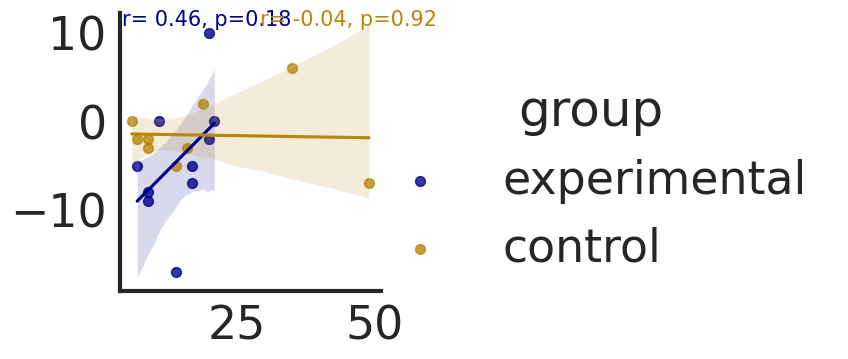

In [17]:
g = sns.lmplot(data=tmp, x='nf2_minus_nf1', y=myy, hue = 'group', 
           aspect = 1.3, palette=mycolors2, scatter_kws={"s": 50},
          ).set(xlabel="", ylabel="");

# add stats info
for grabgroup, c,i  in zip(tmp['group'].unique(), mycolors2, range(len(tmp['group'].unique()))):
    grab = tmp[tmp['group'] == grabgroup].dropna()
    _,_,r,p,_=scipy.stats.linregress(x = grab[myx], y=grab[myy], alternative="two-sided")
    r,p = list(np.around(np.array([r,p]),2))
    plt.text((i+0.17)*25, 10.8, f'r= {r}, p={p}', fontsize = 15, color=c) # first numbers define starting points of text from left-hand side, second numbers define distance between texts

**Figure S6. Association between change in auditory hallucination severity and time elapsed between neurofeedback Intervention and clinical follow-up.** The plot shows the correlation between time elapsed between the neurofeedback intervention (x-axis; number of days) and the change in AHs severity (y-axis), calculated as the difference between the follow-up minus the NFB visit severity. Hallucination severity was measured via the Psychotic Symptom Rating Scale (PSYRATS) hallucination subscale.